In [119]:
!mkdir dataset
!wget https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/ThoracicSurgery_test.csv -P dataset -nc
!wget https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/ThoracicSurgery_train.csv -P dataset -nc

mkdir: cannot create directory ‘dataset’: File exists
File ‘dataset/ThoracicSurgery_test.csv’ already there; not retrieving.

File ‘dataset/ThoracicSurgery_train.csv’ already there; not retrieving.



In [120]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np


In [121]:
DATASET_PATH_TEST = Path('.') / 'dataset' / 'ThoracicSurgery_test.csv'
DATASET_PATH_TRAIN = Path('.') / 'dataset' / 'ThoracicSurgery_train.csv'


def load_dataset(train=True):
    path = DATASET_PATH_TRAIN if train else DATASET_PATH_TEST
    df = pd.read_csv(path)
    return df

In [122]:
pd.set_option('display.max_colwidth', 5000)

df_train = load_dataset(train=True)
df_test = load_dataset(train=False)


df_merged = pd.concat([df_train, df_test])

train_len = df_train.shape[0]
test_len = df_test.shape[0]
total_len = train_len + test_len

df_merged.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN4,0.131687,0.176991,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,0.727273,1
1,DGN2,0.534979,0.398230,PRZ1,0,0,0,1,0,OC12,0,0,0,1,0,0.515152,1
2,DGN3,0.106996,0.097345,PRZ1,0,0,0,1,0,OC13,0,0,0,1,0,0.727273,0
3,DGN2,0.312757,0.303097,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,0.772727,0
4,DGN3,0.419753,0.389381,PRZ1,0,1,0,0,0,OC11,0,0,0,0,0,0.484848,0


In [123]:
def remove_prefix(df, col, prefix):
    df_merged[col] = df_merged[col].apply(lambda s: int(s.replace(prefix, '')))
    df_merged[col] = (df_merged[col] - df_merged[col].min()) / (df_merged[col].max() - df_merged[col].min())  
    return df

In [124]:
remove_prefix(df_merged, 'Diagnosis', 'DGN')
remove_prefix(df_merged, 'Performance', 'PRZ')
remove_prefix(df_merged, 'Tumor_Size', 'OC')

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,0.428571,0.131687,0.176991,0.0,0,0,0,0,0,0.333333,0,0,0,1,0,0.727273,1
1,0.142857,0.534979,0.398230,0.5,0,0,0,1,0,0.333333,0,0,0,1,0,0.515152,1
2,0.285714,0.106996,0.097345,0.5,0,0,0,1,0,0.666667,0,0,0,1,0,0.727273,0
3,0.142857,0.312757,0.303097,0.5,0,0,0,1,0,0.000000,0,0,0,1,0,0.772727,0
4,0.285714,0.419753,0.389381,0.5,0,1,0,0,0,0.000000,0,0,0,0,0,0.484848,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.285714,0.209877,0.176991,0.5,0,0,0,1,1,0.000000,0,0,0,1,0,0.696970,0
133,0.285714,0.559671,0.592920,0.5,0,0,0,1,0,0.333333,0,0,0,1,0,0.621212,0
134,0.714286,0.806584,0.663717,0.5,0,0,0,1,0,0.333333,0,0,0,0,0,0.621212,0
135,0.142857,0.337449,0.336283,0.5,0,0,0,1,0,0.000000,0,0,0,0,0,0.424242,0


>> Cumulative explained variancy for 17 principal components: 1.0
[[ 5.56503612e-01  3.53438663e-01  7.86180668e-01 ...  2.56136958e-03
  -1.78530059e-02 -4.44944995e-02]
 [-3.71236395e-01  1.40002683e-01  2.81373734e-01 ...  5.52125008e-03
   1.43679824e-02  6.48609374e-02]
 [-2.88557893e-01 -2.79914388e-01 -1.29295869e-01 ... -1.70157178e-03
  -1.53322720e-02 -7.32727433e-03]
 ...
 [ 9.80087135e-02  6.33583001e-02 -8.43980798e-01 ...  3.95823215e-03
   1.21555755e-02  5.14443699e-02]
 [ 8.05399733e-02  8.90594993e-02 -8.28525052e-01 ... -3.18274632e-03
  -2.42795126e-02 -5.33937725e-04]
 [-3.34195177e-01  2.21759863e-01 -2.05892957e-01 ... -7.83000945e-03
  -1.61583070e-02 -7.43864856e-02]]
(455, 17)


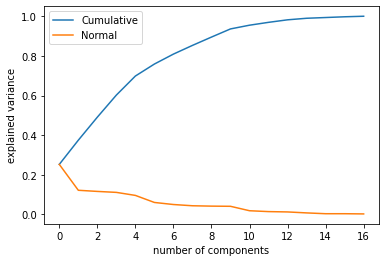

In [140]:
n_components=17
pca = PCA(n_components=n_components, random_state=42)
pca_results = pca.fit_transform(df_merged.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label="Cumulative")
plt.plot(pca.explained_variance_ratio_, label="Normal")
plt.legend()
plt.xlabel('number of components')
plt.ylabel('explained variance')


In [156]:
n_components=9
pca = PCA(n_components=n_components, random_state=42)
pca_results = pca.fit_transform(df_merged.values)
print('>> Cumulative explained variancy for {} principal components: {}'.format(
    n_components,
    np.sum(pca.explained_variance_ratio_))
)

train_pca, test_pca = np.split(pca_results, [train_len], axis=0)

columns_names = [f"pc{i+1}" for i in range(n_components)]

train_pca_df = pd.DataFrame(train_pca, columns=columns_names)
test_pca_df = pd.DataFrame(test_pca, columns=columns_names)

train_pca_df.head()

>> Cumulative explained variancy for 9 principal components: 0.8949036916449692


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.556504,0.353439,0.786181,-0.469483,-0.330527,0.021634,-0.307761,0.231386,-0.111031
1,-0.371236,0.140003,0.281374,-0.653121,-0.432305,-0.194601,-0.102323,-0.037151,-0.012000
2,-0.288558,-0.279914,-0.129296,-0.177253,0.044636,0.162485,-0.029955,0.328903,-0.376847
3,-0.221216,-0.361696,-0.129018,-0.066732,0.063249,0.073286,-0.193276,0.066614,0.179781
4,0.747105,0.830136,-0.461620,0.266832,0.473594,-0.122445,-0.211592,-0.193050,0.047532


In [157]:
TRAIN_SAVE_PATH = Path('.') / 'dataset' / 'ThoracicSurgery_pca_train.csv'
TEST_SAVE_PATH = Path('.') / 'dataset' / 'ThoracicSurgery_pca_test.csv'
train_pca_df.to_csv(TRAIN_SAVE_PATH, index=False)
test_pca_df.to_csv(TEST_SAVE_PATH, index=False)
